<a href="https://colab.research.google.com/github/Remon19/journey-into-ML/blob/main/Perceptron%20%26%20Adaptive%20linear%20neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
class Perceptron():
  """perceptron classifier


  Parameters
  __________________________
  eta : float
    Learning rate (between 0.0 & 1.0)
  n_iter : int
    Number of epochs of training
  random_state : int
    Random number generator seed used for random weight initialzation.

  Attributes
  __________________________
  w_ : 1d-array 
    Weights 
  b_ : scalar
    Bias 
  errors_ : list
    Number of missclassifications (updates) in each epoch.

  """
  def __init__(self,eta,n_iter,random_state = 47):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state


  def fit(self,X,Y):
    """ Fitting training data
    
    Parameters
    ___________________________
    X : array-like, shape = [n_examples,n_features]
      Training Vectors ,where n_examples is the nuber of training examples
      and n_features is the number of features.
    Y : array-like , shape = [n_examples]
      Target values.


    returns
    ____________________________
    self : object

     """
    #rngen = np.random.RandomState(self.random_state)
    self.w_ = np.random.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
    self.b_ = np.float_(0.)
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0 
      for xi, target in zip(X,Y):
        update = self.eta * (target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def predict(self, X):
      return np.where(self.net_input(X) >= 0.0, 1, 0)

  def net_input(self,x):
    return np.dot(x,self.w_)+self.b_



    


In [69]:
class AdalineGD:
  """Adaptive Linear Neuron
  
  Parameter
  ____________________
  eta: float 
    Learning rate between(0.0 & 1.0)
  n_iter: int
    Number of iterations (epochs)
  shuffle : bool
    shuffle training data each epoch if True to prevent
    cycles
  
  random_state : int
    Seed to initialize random number generator
    
    
  Attributes
  ____________________
  w_ : 1d- array 
    Weights 
  b_ : scalar
    Bias term
  losses_ : list
    Mean squred error in each epoch
    
    
    """
  def __init__(self,eta=.01,n_iter=50,random_state=42,shuffle = True):
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    self.shuffle = shuffle
    self.random_state = random_state
  
  def fit(self,X,y):
    """Fitting training data
    
    
    Parameters
    _______________
    X : {array-like} shape = [n_examples,n_features] 
      Training vectors ,where n_examples is the number of
      examples and n_features is the number of features.
    y : {array-like} , shape = [n_examples]
      Target values.

    Returns
    _______________
    self : object

    """
    self._initialize_weights(X.shape[1])
    self.losses_ = []

    for i in range(self.n_iter):
      if self.shuffle :
        X, y = self._shuffle(X, y)
      losses = []
      for xi, target in zip(X,y):
        losses.append(self._update_weights(xi,target))
      avg_loss = np.mean(losses)
      self.losses_.append(avg_loss)
    return self



    def partial_fit(self,X,y):
      """Fitting training data without reinitializing the weights"""
      if not self.w_initialized:
        self._initialize_weights(X.shape[1])
      if y.ravel().shape[0] > 1:
        for xi , target in zip(X, y):
          self._update_weights(xi,target)
      else:
        self._update_weights(X,y)
      return self

    def _shuffle(self, X, y):
      r = self.rgen.permutations(len(y))
      return X[r], y[r]


    def _initialize_weights(self,m):
      self.rgen = np.random.RandomState(self.random_state)
      self.w_ = self.rgen.normal(loc = 0.0, scale =0.01, 
                           size = m)
      self.b_ = np.float(0.0)
      self.w_initialized = True

    def _update_weights(self, xi, target):
      net_input = self.net_input(xi)
      output = self.activation(net_input)
      error = target - output
      self.w_ += self.eta * 2.0 * error * xi
      self.b_ += self.eta * 2.0 * error
      loss = errors**2
      return loss

    def net_input(self,X):
      """ Calculate net input"""
      return np.dot(X,self.w_)+self.b_

    def activation(self,X):
      """ Calculate activation"""
      return X

    def predict(self,X):
     """ Predicting the output"""
     return np.where((self.activation(self.net_input(X)))>= 0.5,1,0)




In [31]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/'\
 'machine-learning-databases/iris/iris.data'

print('From URL:', s)

df = pd.read_csv(s,header = None , encoding= 'UTF-8')
df.head()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
from pandas.errors import InvalidIndexError
import matplotlib.pyplot as plt
%matplotlib inline 


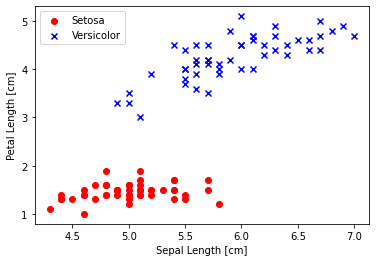

In [33]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
x = df.iloc[0:100,[0, 2]].values

plt.scatter(x[:50,0],x[:50,1],color = 'red', marker ='o', label = 'Setosa' )
plt.scatter(x[50:,0],x[50:,1],color = 'blue', marker ='x', label = 'Versicolor' )
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc = 'upper left')
plt.show()

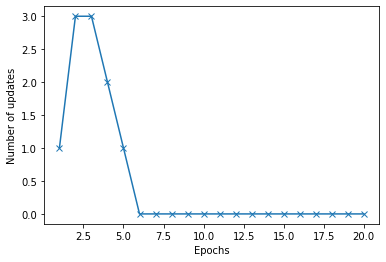

In [34]:
pp = Perceptron(eta = 0.1,n_iter = 20)
pp.fit(x,y)
plt.plot(range(1, len(pp.errors_)+1),pp.errors_, marker = 'x')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [35]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, Y, Classifier, resolution = 0.02):
  markers = ('o','s','x','v','#')
  colors = ('red','blue','green','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(Y))])


  x1_min , x1_max = X[:, 0].min() -1 , X[:, 0].max() + 1
  x2_min , x2_max = X[:, 1].min() -1 , X[:, 1].max() + 1

  xx1 , xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
  
  lab = Classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)

  plt.contourf(xx1, xx2, lab, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(Y)):
    plt.scatter(x = X[Y == cl, 0], y = X[Y == cl, 1],
                alpha = 0.8,
                c = colors[idx],
                marker = markers[idx],
                label = f'Class {cl}',
                edgecolors= 'black'
                )




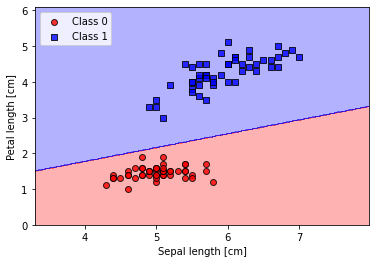

In [36]:
plot_decision_regions(x,y,Classifier = pp)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


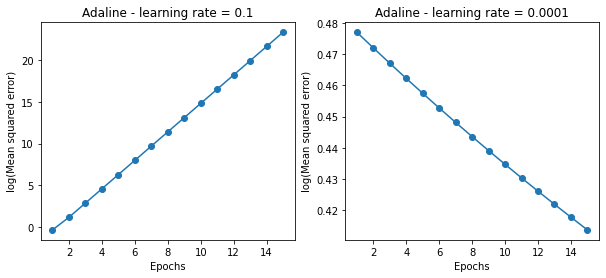

In [50]:
fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize= (10,4))
ada1 = AdalineGD(n_iter = 15, eta = 0.1).fit(x,y)
ax[0].plot(range(1, len(ada1.losses_) +1 ), 
          np.log10(ada1.losses_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - learning rate = 0.1')
ada2 = AdalineGD(n_iter = 15, eta = 0.0001).fit(x,y)
ax[1].plot(range(1, len(ada2.losses_) +1 ), 
         ada2.losses_, marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Mean squared error)')
ax[1].set_title('Adaline - learning rate = 0.0001')
plt.show()


In [51]:
# try feature standardaization
x_std = np.copy(x)
x_std[:,0] = (x_std[:,0] - x[:,0].mean()) / x[:,0].std()
x_std[:,1] = (x_std[:,1] - x[:,1].mean()) / x[:,1].std()



In [68]:
ada3 = AdalineGD(n_iter = 20, eta = 0.5)
ada3.fit(x_std,y)
plot_decision_regions(x_std,y,ada3)
plt.figure()
plt.plot(range(1,len(ada3.losses_)+1),
        ada3.losses_, marker = 'o'  )

plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.title('Adaline - learning rate = 0.5')


AttributeError: ignored

In [72]:
ada_sgd = AdalineGD(n_iter = 15, eta = 0.01)
ada_sgd.fit(x,y)
plot_decision_regions(x_std,y,ada_sgd)
plt.title('Adaline - Stochastic graient descent')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 'upper left')
plt.figure()
plt.plot(range(1,len(ada_sgd.losses_)+1),
        ada_sgd.losses_, marker = 'o'  )

plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.show()

AttributeError: ignored